<div style="text-align: right"><b> Ana Valentina López Chacón & Isabella Martínez Martínez & Sara Julieth Zuleta Quevedo. </b></div>

# **Proyecto 2: De clasificación a NER**

En este proyecto utilizarán [este dataset](https://archive.ics.uci.edu/ml/datasets/Paper+Reviews) que consiste en evaluaciones de diferentes revisores sobre papers (405). Cada evaluación ha sido etiquetada con 5 clases (muy negativo, negativo, 0, neutral, positivo y muy positivo). Este proyecto consiste en realizar una clasificación de este dataset y además identificar que parte de los comentarios hacen referencia a las clases. 

## **Parte 1. Clasificación sencilla de cada revisión**

En esta parte tendrá que hacer un modelo de clasificación usando redes recurrentes (LSTM, GRU), para los cinco tipos de categorías.  Recuerde algunos pasos para realizar la clasificación:

1. Lectura de los datos (división en training/validation sets)
2. Preprocesamiento del texto (no es necesario ser tanto preprocesamiento como en word2vec, pero si eliminar algunos caracteres o incluso revisar si hay comentarios vacíos). 
3. Creación del vocabulario y transformación de palabras a índices (y viceversa)
4. Creación del "dataset" y "dataloader" involucrando los pasos 2 y 3.
5. Creación del modelo, involucrando embeddings.
6. Entrenar y validar (escoger optimizador Adam o AdamW, función de costo apropiada, loops de entrenamiento y validación).
7. Modelo listo para producción (modelo para predecir entrando un comentario)
8. Pequeña interfaz para predicción usando Gradio.

Realice diferentes configuraciones, tamaño del embedding, arquitecturas LSTM o GRU, varias capas, bidireccionalidad, etc. Escoja el mejor modelo. 

## **Parte 2. Convirtiendo el texto a un problema de clasificación por palabras o frases (NER)**

### **Parte 2a. Etiquetado**
Etiquetado de los comentarios frases a frases
Usando herramientas como [brat](https://brat.nlplab.org/), [docanno](https://doccano.herokuapp.com/) o [inception](https://inception-project.github.io/) (ver [este blog](https://dida.do/blog/the-best-free-labeling-tools-for-text-annotation-in-nlp) para un rápido resumen sobre estas aplicaciones), deberán etiquetar las frases en los comentarios con las etiquetas que correspondan a cada categoría. Un ejemplo para el primer comentario lo muestra la siguiente figura: 
![image](ejemploetiquetado.png)

Nota: El anterior ejemplo lo hice en la herramienta de inception (y exportando el archivo a WebAnno TSV v3.3).
Como pueden observar la mayoría de palabras no se etiquetarán (pertenecen a una categoría como "otros").

No deben etiquetar todo el dataset, pueden hacerlo con unas 50 (por grupo). Pero pueden intercambiarse (entre grupos) los datasets etiquetados para incrementar el número de datos (para esto es recomendable usar la misma herramienta y el mismo tipo de archivo de exportación).

### **Parte 2b. Clasificación y localización de las frases**
Cree un modelo de clasificación por palabra (es similar al punto 2 del taller 4), donde involucren redes recurrentes. Cuando varias palabras contiguas pertenezcan a la misma etiqueta deberan unirlas para etiquetarlas como frase.  Para este modelo deben seguir los mismos pasos de la parte 1, pero cambiando un poco el modelo. 

- Desarrolle un modelo inicializando los pesos de forma aleatoria (por defecto)
- Desarrolle un modelo partiendo de los pesos de la parte 1.
- Desarrolle un modelo word2vec y posteriormente cargue estos pesos en la capa de embedding para desarrollar el modelo recurrente.Les puede ser útil [esto](https://gist.github.com/dhruvdcoder/cbb8d7967a499ba85418c18414e2cdce).
- Compare los modelos anteriores.
- Visualice la clasificación de algunas frases del conjunto de validación usando spacy o la herramienta que usaron para etiquetar.

-----
Es importante que realicen gráficos y visualizaciones que ayuden a la interpretación. No olviden ir analizando y comentando los hallazgos, y sobretodo **concluir**. El entregable es un notebook de Jupyter, debidamente presentado y comentado.

- ¿Qué diferencian encuentran con un tipo de clasificación respecto al otro?
- ¿Los pesos de una tarea ayudan a la otra?
- ¿Es posible analizar o intuir a partir de pesos o activaciones, que parte del texto está ayudando en la parte 1 a clasificar?

## **Parte 3 [Opcional]. Modelo de Generación de revisiones**

Esta parte es totalmente opcional, no puntua en si para el proyecto (pero si puede dar bonificación).
En esta parte debera crear un modelo de generación de texto a partir del corpus completo de las revisiones. Esto es lo que se conoce como un modelo de generación del texto. La idea es usar modelos recurrentes para generar texto. Básicamente es crear un modelo que pueda predecir las palabras del corpues teniendo en cuenta los estados anteriores (los tokens anteriores).  Se podría por ejemplo iniciar con una frase y posteriormente producir una palabra, luego se une a la frase y se sigue así de forma sucesiva. Si desean hacer esta parte, [este blog](https://www.analyticsvidhya.com/blog/2020/08/build-a-natural-language-generation-nlg-system-using-pytorch/) y [este otro blog](https://www.kdnuggets.com/2020/07/pytorch-lstm-text-generation-tutorial.html) les puede servir de ayuda.

### Tip de lectura de datos del archivo JSON

# **Implementación**

## **Parte 1. Clasificación sencilla de cada revisión**

**Punto 1.**

Vamos a leer los datos del archivo `reviews.json`, a limpiarlos y a dividir en conjunto de entrenamiento y validación. Para ello, primero importemos las librerías necesarias para el desarrollo del proyecto.


In [ ]:
!pip install -q gradio

     |████████████████████████████████| 668 kB 4.3 MB/s 
     |████████████████████████████████| 211 kB 25.5 MB/s 
     |████████████████████████████████| 1.1 MB 40.8 MB/s 
     |████████████████████████████████| 255 kB 53.4 MB/s 
     |████████████████████████████████| 84 kB 1.8 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 2.0 MB 38.1 MB/s 
     |████████████████████████████████| 271 kB 48.5 MB/s 
     |████████████████████████████████| 144 kB 50.8 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 10.9 MB 28.1 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 61 kB 402 kB/s 
     |████████████████████████████████| 3.6 MB 36.2 MB/s 
     |████████████████████████

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
from torchtext.vocab import vocab
import sklearn
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import re
from collections import Counter, OrderedDict
from unicodedata import normalize
import json

import gradio as gr

Leemos el archivo y lo guardamos en un *dataframe* de `Pandas`.

In [ ]:
f = open('reviews.json', encoding="utf8")
data = json.load(f)
f.close()

df = pd.json_normalize(data['paper'], record_path=["review"])
df.head()


,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,4,2,2,es,0,,,2010-07-05


**Punto 2.** 

Para empezar el preprocesamiento vamos a asegurarnos de que la escala de *evaluation* sean solo números positivos y que la red neuronal lo pueda entender como clases válidas.

In [ ]:
df["evaluation"] = df["evaluation"].apply(lambda x: int(x) + 2)

También nos vamos a deshacer de filas en donde haya comentarios vacíos, pues no aportan nada al problema.

In [ ]:
df = df.drop(df[df['text'] == ""].index, axis=0)
df.reset_index(drop = True, inplace = True)
df.head()

,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,4,3,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,4,3,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,5,3,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,4,4,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,4,4,3,es,0,,Los autores describen una metodología para des...,2010-07-05


Con el fin de obtener un resultado con sentido, se realiza la limpieza del texto para eliminar caracteres especiales y cualquier cosa que pueda perturbar el desarrollo del modelo.

In [ ]:
def clean_text(text):
    text = re.sub(
            r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
            normalize( "NFD", text), 0, re.I
        )
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
    return text

def tokenizer(text):
    tokenized = text.split()
    return tokenized

In [ ]:
df["clean_text"] = df["text"].apply(clean_text)

In [ ]:
df.head()

,confidence,evaluation,id,lan,orientation,remarks,text,timespan,clean_text
0,4,3,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,el articulo aborda un problema contingente y ...
1,4,3,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,el articulo presenta recomendaciones practicas...
2,5,3,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,el tema es muy interesante y puede ser de muc...
3,4,4,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,se explica en forma ordenada y didactica una e...
4,4,4,3,es,0,,Los autores describen una metodología para des...,2010-07-05,los autores describen una metodologia para des...


Con el fin de conocer la distribución de nuestros datos se va a contar los valores de cada una de las etiquetas.

In [ ]:
df.evaluation.value_counts()

4    106
3     86
0     86
2     62
1     59
Name: evaluation, dtype: int64

Podemos ver como algunas clases tienen una mayor cantidad de miembros con respecto a las otras, esto puede ocasionar que el modelo clasifique de forma parcial. Con el fin de evitar esto se van a asignar ciertos pesos con la librería `sklearn` que simulen un comportamiento balanceado para las etiquetas.

In [ ]:
loss_weights = sklearn.utils.class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(df["evaluation"]), y = df["evaluation"])
loss_weights

array([0.92790698, 1.35254237, 1.28709677, 0.92790698, 0.75283019])

Ahora, procedemos a definir una clase para organizar el *dataset* y acceder fácilmente a cada texto con su etiqueta.

In [ ]:
class TextData(Dataset):
    def __init__(self, dataframe):
        super(TextData, self).__init__()
        self.df = dataframe[["evaluation", "clean_text"]]
        
    def __getitem__(self, index):
        return self.df.iloc[index,0], self.df.iloc[index,1]
    
    def __len__(self):
        return len(self.df)

In [ ]:
ds = TextData(df)

Finalmente, se dividen los datos en entrenamiento y validación, utilizando un 70% para entrenar y un 30% para validar. Utilizamos la función `random_split` de `torch`.

In [ ]:
train_dataset, valid_dataset = random_split(ds,
 [int(len(ds)*0.7),len(ds) - int(len(ds)*0.7)], torch.manual_seed(42))

**Punto 3.**

Ahora, vamos a crear el vocabulario solo con los textos del conjunto de entrenamiento, para no sesgar al modelo y que conozca de antemano palabras que no debería. Usamos la función `vocab` de `torchtext` y agregamos palabras para *padding* y para palabras desconocidas, o *unknown*.

In [ ]:
token_counts = Counter()

for label, line in train_dataset:
    tokens = tokenizer(line)
    token_counts.update(tokens)
 
print('Vocab-size:', len(token_counts))

Vocab-size: 5426


In [ ]:
sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)

vocab = vocab(ordered_dict)

vocab.insert_token("<pad>", 0)
vocab.insert_token("<unk>", 1)
vocab.set_default_index(1)


Con el fin de emplear los recursos de *colab* se crea el dispositivo para almacenar información en la GPU, una pequeña función `text_pipeline` para convertir palabras a índices, y la función `collate_batch` para retornar cada texto de prueba del batch con su respectivo *padding* tanto en el texto como en las etiquetas.

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]

def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _label, _text in batch:
        label_list.append(_label)
        processed_text = torch.tensor(text_pipeline(_text), 
                                      dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

**Punto 4.**

Ahora bien, se crean los *loaders* de entrenamiento y validación necesarios para evaluar nuestra arquitectura. Usamos un tamaño de *batch* por defecto de 64.

In [ ]:
train_dl = DataLoader(train_dataset, batch_size=64,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=64,
                      shuffle=True, collate_fn=collate_batch)

**Punto 5.**

Ahora se define el modelo de red neuronal recurrente. Este recibe el tamaño del vocabulario, la dimensión del embedding, la dimensión oculta de la capa LSTM y la dimensión de una capa lineal oculta. Internamente, la red no realiza `softmax`.

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, 
                           batch_first=True, bidirectional = True, dropout = 0.2, num_layers = 3)
        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size).to(device)
        self.rel = nn.ReLU().to(device)
        self.fc2 = nn.Linear(fc_hidden_size, 5).to(device)

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        lstm_out, (hidden, cell)= self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        out = self.fc1(out)
        out = self.rel(out)
        out = self.fc2(out)
        return out

Definimos el modelo, la semilla para la reproducibilidad y lo mandamos a la GPU.

In [ ]:
vocab_size = len(vocab)
embed_dim = 200
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)


**Punto 6.** 

Vamos a definir las funciones de entrenamiento y validación por cada época. En estas ya se lleva a cabo el proceso de `softmax` para poder verificar el accuracy, pero no se hizo en la red neuronal dado que se escogió como función de pérdida el `CrossEntropy` que ya lo hace internamente.


In [ ]:
def train_epoch(loss_function, optimizer, model, loader):
    model.train()
    total_acc, total_loss = 0, 0
    softmax = nn.Softmax(dim=1)
    for batch_inputs, batch_labels, batch_lengths in loader:
        optimizer.zero_grad()
        outputs = model.forward(batch_inputs, batch_lengths)
        outputs_probs = softmax(outputs)
        loss = loss_function(outputs.to(device), batch_labels.type(torch.LongTensor).to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*batch_labels.size(0)
        total_acc += (torch.argmax(outputs_probs, 1) == batch_labels).float().mean().item()*batch_labels.size(0)
        
    return total_acc/len(loader.dataset), total_loss/len(loader.dataset)

def evaluate_epoch(loss_function, model, loader):
    model.eval()
    total_acc, total_loss = 0, 0
    softmax = nn.Softmax(dim=1)
    with torch.no_grad():
        for batch_inputs, batch_labels, batch_lengths in loader:
            outputs = model.forward(batch_inputs, batch_lengths)
            outputs_probs = softmax(outputs)
            loss = loss_function(outputs.to(device), batch_labels.type(torch.LongTensor).to(device))
            total_loss += loss.item()*batch_labels.size(0)
            total_acc += (torch.argmax(outputs_probs, 1) == batch_labels).float().mean().item()*batch_labels.size(0)
    return total_acc/len(loader.dataset), total_loss/len(loader.dataset)

def train(loss_function, optimizer, model, train_loader, valid_loader, num_epochs=10000, plot=True):
    
    train_losses, valid_losses = [], []
    train_accs, valid_accs = [], []
    
    for epoch in range(num_epochs):
        acc_train, loss_train = train_epoch(loss_function, optimizer, model, train_loader)
        acc_valid, loss_valid = evaluate_epoch(loss_function, model, valid_loader)
        train_losses.append(loss_train)
        valid_losses.append(loss_valid)
        train_accs.append(acc_train)
        valid_accs.append(acc_valid)
        
        print(f'Epoch {epoch} accuracy: {acc_train:.4f} loss: {loss_train:.4f} val_accuracy: {acc_valid:.4f}  val_loss: {loss_valid:.4f}')

    if(plot == True):
        plt.figure(1)
        plt.subplot(211)
        plt.plot(range(num_epochs), train_losses, label='Loss train')
        plt.plot(range(num_epochs), valid_losses, label = 'Loss valid')
        plt.legend(loc = "best")
        plt.subplot(212)
        plt.plot(range(num_epochs), train_accs, label='Accuracy train')
        plt.plot(range(num_epochs), valid_accs, label = 'Accuracy valid')
        plt.legend(loc = "best")

        plt.show()

Finalmente, se procede a entrenar el modelo y visualizar sus resultados. Note que el optimizador escogido es el `AdamW` y a la función de pérdida se le pasan como parámetro los pesos calculados anteriormente.

Epoch 0 accuracy: 0.2473 loss: 1.6120 val_accuracy: 0.2917  val_loss: 1.6097
Epoch 1 accuracy: 0.2616 loss: 1.6062 val_accuracy: 0.1833  val_loss: 1.6107
Epoch 2 accuracy: 0.2366 loss: 1.5989 val_accuracy: 0.1917  val_loss: 1.6096
Epoch 3 accuracy: 0.3047 loss: 1.5893 val_accuracy: 0.2333  val_loss: 1.6070
Epoch 4 accuracy: 0.4337 loss: 1.5703 val_accuracy: 0.2417  val_loss: 1.6032
Epoch 5 accuracy: 0.5090 loss: 1.5291 val_accuracy: 0.2833  val_loss: 1.5959
Epoch 6 accuracy: 0.5735 loss: 1.4332 val_accuracy: 0.2917  val_loss: 1.5883
Epoch 7 accuracy: 0.5842 loss: 1.2667 val_accuracy: 0.2667  val_loss: 1.6193
Epoch 8 accuracy: 0.7097 loss: 1.0391 val_accuracy: 0.2833  val_loss: 1.6751
Epoch 9 accuracy: 0.8100 loss: 0.8343 val_accuracy: 0.2250  val_loss: 1.7899
Epoch 10 accuracy: 0.8495 loss: 0.6011 val_accuracy: 0.3333  val_loss: 1.8406
Epoch 11 accuracy: 0.9247 loss: 0.3889 val_accuracy: 0.2833  val_loss: 2.2406
Epoch 12 accuracy: 0.9570 loss: 0.2362 val_accuracy: 0.3167  val_loss: 2.1

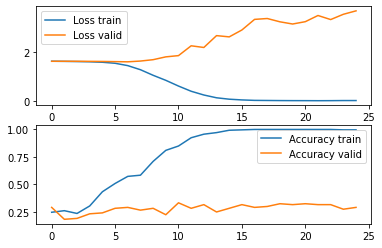

In [ ]:
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor(loss_weights, dtype = torch.float).to(device))
optimizer = torch.optim.AdamW(model.parameters())

train(loss_fn, optimizer, model, train_dl, valid_dl, num_epochs = 25)

El modelo resultante no se comporta de la mejor manera y entra rápidamente en overfitting. Su precisión es de aproximadamente 30%, por lo que se comporta mejor que escoger una clase al azar.

Con el fin de optimizar recursos se guarda el modelo previamente computado.

In [ ]:
torch.save(model, "modelo_1")

# **Punto 7 y 8.**

Aquí usamos el modelo listo para producción y una pequeña interfaz gráfica de Gradio para utilizar el modelo. Se carga si es necesario o si no se ejecutó el ciclo de entrenamiento.

In [ ]:
model = torch.load("modelo_1")

In [ ]:
def model_prediction(comment):
  dic = {0:"MUY NEGATIVO", 1:"NEGATIVO", 2:"NEUTRO", 3:"POSITIVO", 4:"MUY POSITIVO"}
  softmax = nn.Softmax(dim=1)
  test_sentence = clean_text(comment)
  test_sentence = text_pipeline(test_sentence) 
  test_lengths = [len(test_sentence)]
  test_lengths = torch.LongTensor(test_lengths).to(device)
  test_sentence = torch.LongTensor([test_sentence]).to(device)
  outputs = model.forward(test_sentence, test_lengths)
  outputs = softmax(outputs)
  labels_pred = torch.argmax(outputs, dim=1)
  number_label = labels_pred.item()
  return dic[number_label]


In [ ]:
iface = gr.Interface(fn=model_prediction, inputs="text", outputs="text")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://14350.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f28e7acc210>,
 'http://127.0.0.1:7861/',
 'https://14350.gradio.app')

## **Parte 2. Convirtiendo el texto a un problema de clasificación por palabras o frases (NER)**

### **Parte 2a. Etiquetado**

En primer lugar, se realiza la lectura de los datos. Se etiquetan los comentarios del 50 al 100 y se tomaron 25 comentarios etiquetados por otro compañero.

In [ ]:
from webanno_tsv import *

doc = webanno_tsv_read_file('test-nlp.tsv')
num_sentences = len(doc.sentences)
train_labels = [[] for i in range(num_sentences)]
sentences = [[] for i in range(num_sentences)]
for annotation in doc.annotations:
    label = annotation.label
    tokens = annotation.tokens
    for token in tokens:
        word = token.text
        indx = token.sentence_idx-1
        train_labels[indx].append(label)
        sentences[indx].append(word)

In [ ]:
doc = webanno_tsv_read_file('annotate.tsv')
num_sentences = len(doc.sentences)
train_labels += [[] for i in range(num_sentences)]
sentences += [[] for i in range(num_sentences)]
for annotation in doc.annotations:
    label = annotation.label
    tokens = annotation.tokens
    for token in tokens:
        word = token.text
        indx = token.sentence_idx-1
        train_labels[indx].append(label)
        sentences[indx].append(word)

Se genera un diccionario para asignar un valor numérico a la etiqueta de texto y se crean el listado con las etiquetas de entrenamiento.

In [ ]:
tag_to_ix = {"otro": 0, "muy negativo": 1, "negativo": 2, "neutral": 3, "positivo": 4, "muy positivo": 5}

In [ ]:
train_labels = [[tag_to_ix[label] for label in sentece_labels] for sentece_labels in train_labels]

Ahora, se realiza la partición de los datos en conjuntos de entrenamiento y validación. Esta vez, usamos la función `train_test_split` de la librería `sklearn`. Posteriormente, se define el vocabulario para el modelo y se agregan palabras para *padding* y para palabras desconocidas o *unknown*.

In [ ]:
train_sentences, valid_sentences, train_labels, valid_labels = train_test_split(sentences, train_labels, test_size=0.2, random_state=42)

In [ ]:
vocabulary = set(w for s in train_sentences for w in s)
vocabulary.add("<unk>")
vocabulary.add("<pad>") 

In [ ]:
ix_to_word = sorted(list(vocabulary))
word_to_ix = {word: ind for ind, word in enumerate(ix_to_word)}

Se realiza la transformación de texto plano a índices. 

In [ ]:
train_sentences = [[word_to_ix.get(s, word_to_ix["<unk>"]) for s in sentence] for sentence in train_sentences]
valid_sentences = [[word_to_ix.get(s, word_to_ix["<unk>"]) for s in sentence] for sentence in valid_sentences]

Se define la función customizada para manejar cada batch. En este sentido, se realiza el *padding* para el texto y para las etiquetas, para que cada texto dentro del batch tenga la misma longitud.

In [ ]:
def custom_collate_fn(batch, pad_token_ix):
    x, y = zip(*batch)

    x = [torch.LongTensor(x_i) for x_i in x]
    x_padded = nn.utils.rnn.pad_sequence(x, batch_first=True, padding_value=pad_token_ix)

    lengths = [len(label) for label in y]
    lenghts = torch.LongTensor(lengths)

    y = [torch.LongTensor(y_i) for y_i in y]
    y_padded = nn.utils.rnn.pad_sequence(y, batch_first=True, padding_value=0)
    return x_padded, y_padded, lenghts

Luego, se procede a crear el modelo. Este recibe la dimensión del embedding, un tamaño de vocabulario, la dimensión oculta de la capa LSTM y el tamaño del conjunto de etiquetas. Además, si recibe un parámetro de *embedding_init*, inicializará la capa de embeddings con los pesos ingresados. La red misma realiza un proceso de `log_softmax` al final.

In [ ]:
class LSTMTagger(nn.Module):
    
    def __init__(self, embedding_dim, vocab_size, hidden_dim, tagset_size, 
                 embedding_init=None):
        super(LSTMTagger, self).__init__()
        
        if(embedding_init != None):
            self.word_embeddings = nn.Embedding.from_pretrained(embedding_init)
        else:
            self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim,
                            num_layers=1, bidirectional=True)

        self.hidden2tag = nn.Linear(2*hidden_dim, tagset_size)
                
    def forward(self, inputs):
        embeds = self.word_embeddings(inputs)  
        lstm_out, _ = self.lstm(embeds)
        tag_space = self.hidden2tag(lstm_out)
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

Se preparan los datos, se define la función de pérdida y se crean los *loaders* para el entrenamiento y prueba con el fin de evaluar la arquitectura. Aquí, el tamaño de los batches constituye al 60% de los datos de entrenamiento o de validación. Como función de pérdida, se toma como base la `Negative Log Likelihood Loss`.

In [ ]:
train_batch_size, validation_batch_size = int(len(train_sentences)*0.6), int(len(valid_sentences)*0.6)
collate_fn = partial(custom_collate_fn, pad_token_ix=word_to_ix["<pad>"])

train_data = list(zip(train_sentences, train_labels))
valid_data = list(zip(valid_sentences, valid_labels))

train_loader = DataLoader(train_data, batch_size=train_batch_size,
                      shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, batch_size=validation_batch_size,
                      shuffle=True, collate_fn=collate_fn)

def loss_function(batch_outputs, batch_labels, batch_lengths):    
    celoss = nn.NLLLoss()
    loss = celoss(batch_outputs.permute(0,2,1), batch_labels.type(torch.LongTensor))
    loss = loss / batch_lengths.sum().float()
    return loss

### **Parte 2b. Clasificación y localización de las frases**

Se definen las funciones necesarias para realizar y visualizar el entrenamiento de la forma más apropiada y de forma análoga a la sección anterior.

In [ ]:
def train_epoch(loss_function, optimizer, model, loader):
    model.train()
    total_acc, total_loss = 0, 0
    for batch_inputs, batch_labels, batch_lengths in loader:
        optimizer.zero_grad()
        outputs = model.forward(batch_inputs)
        loss = loss_function(outputs, batch_labels, batch_lengths)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_acc += (torch.argmax(outputs, 2) == batch_labels).float().mean().item()*batch_labels.size(0)
        
    return total_acc/len(loader.dataset), total_loss

def evaluate_epoch(loss_function, model, loader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for batch_inputs, batch_labels, batch_lengths in loader:
            outputs = model.forward(batch_inputs)
            loss = loss_function(outputs, batch_labels, batch_lengths)
            total_loss += loss.item()
            total_acc += (torch.argmax(outputs, 2) == batch_labels).float().mean().item()*batch_labels.size(0)
    return total_acc/len(loader.dataset), total_loss

def train(loss_function, optimizer, model, train_loader, valid_loader, num_epochs=10000, plot=True):
    
    train_losses, valid_losses = [], []
    train_accs, valid_accs = [], []
    
    for epoch in range(num_epochs):
        acc_train, loss_train = train_epoch(loss_function, optimizer, model, train_loader)
        acc_valid, loss_valid = evaluate_epoch(loss_function, model, valid_loader)
        train_losses.append(loss_train)
        valid_losses.append(loss_valid)
        train_accs.append(acc_train)
        valid_accs.append(acc_valid)
        
        if((epoch+1)%10 == 0 or epoch == 0):
            print(f'Epoch {epoch} accuracy: {acc_train:.4f} loss: {loss_train:.4f} val_accuracy: {acc_valid:.4f}  val_loss: {loss_valid:.4f}')

    if(plot == True):
        plt.figure(1)
        plt.subplot(211)
        plt.plot(range(num_epochs), train_losses, label='Loss train')
        plt.plot(range(num_epochs), valid_losses, label = 'Loss valid')
        plt.legend(loc = "best")
        plt.subplot(212)
        plt.plot(range(num_epochs), train_accs, label='Accuracy train')
        plt.plot(range(num_epochs), valid_accs, label = 'Accuracy valid')
        plt.legend(loc = "best")

        plt.show()

#### **Pesos Aleatorios**

Se inicializa el modelo con los pesos definidos por defecto. Note que el resultado es bastante satisfactorio, logrando una precisión final del 55%.

Epoch 0 accuracy: 0.3939 loss: 0.0027 val_accuracy: 0.6289  val_loss: 0.0113
Epoch 9 accuracy: 0.6680 loss: 0.0028 val_accuracy: 0.5655  val_loss: 0.0126
Epoch 19 accuracy: 0.6608 loss: 0.0028 val_accuracy: 0.6832  val_loss: 0.0116
Epoch 29 accuracy: 0.6720 loss: 0.0027 val_accuracy: 0.4753  val_loss: 0.0180
Epoch 39 accuracy: 0.6754 loss: 0.0027 val_accuracy: 0.6906  val_loss: 0.0113
Epoch 49 accuracy: 0.6653 loss: 0.0027 val_accuracy: 0.5520  val_loss: 0.0121


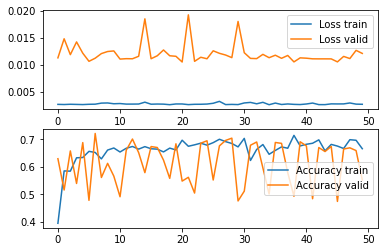

In [ ]:
embedding_dim = 200
lstm = LSTMTagger(embedding_dim=embedding_dim, vocab_size=len(word_to_ix), 
                  tagset_size=len(tag_to_ix), hidden_dim = 64)

optimizer = torch.optim.AdamW(lstm.parameters())
train(loss_function, optimizer, lstm, train_loader, valid_loader, num_epochs=50)

#### **Pesos del Modelo Anterior**

En este caso, se inicializan los pesos del modelo con los parámetros de la sección anterior, para esto se guardó el modelo previamente computado. Dependiendo del entorno de ejecución, es posible que toque cargarlo utilizando el argumento de map_location en la línea de código comentada.

In [ ]:
model = torch.load("modelo_1")
#model = torch.load("modelo_1", map_location=torch.device('cpu'))


Comprobamos las dimensiones de los pesos de la capa de embedding de dicho modelo.

In [ ]:
model.embedding.weight.shape

torch.Size([5428, 200])

Note que se deben adaptar los diccionarios para que estos se entiendan mutuamente, dado que las palabras de entrenamiento en esta sección tienen índices distintos a los del vocabulario del primer modelo.

In [ ]:
word_to_ix["paper"]

1533

In [ ]:
vocab["paper"]

59

Esto se puede arreglar de la siguiente forma:

In [ ]:
mt = np.zeros((len(word_to_ix), model.embedding.weight.shape[1]))
for word in word_to_ix.keys():
    mt[word_to_ix[word], :] = model.embedding.weight[vocab[word], :].cpu().detach().numpy()

Vamos a guardar los pesos del anterior modelo.

In [ ]:
torch.save(model.state_dict(), 'weights_only.pth')

Para poder usarlos es necesario tener una red con la misma arquitectura, por lo que la definimos de la misma manera.

In [ ]:
class LSTMTagger_2(nn.Module):
    
    def __init__(self, embedding_dim, vocab_size, rnn_hidden_size, fc_hidden_size, tagset_size, 
                 embedding_init=None):
        super(LSTMTagger_2, self).__init__()
        
        if(embedding_init != None):
            self.embedding = nn.Embedding.from_pretrained(embedding_init)
        else:
            self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.rnn = nn.LSTM(input_size=embedding_dim, hidden_size=rnn_hidden_size,
                            num_layers=3, bidirectional=True, batch_first = True,
                            dropout = 0.2)

        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size)
        self.rel = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, tagset_size)
                
    def forward(self, inputs):
        embeds = self.embedding(inputs)  
        lstm_out, _ = self.rnn(embeds)
        out = self.fc1(lstm_out)
        out = self.rel(out)
        out = self.fc2(out)
        tag_scores = F.log_softmax(out, dim=1)
        return tag_scores

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
embedding_dim = 200
lstm_2 = LSTMTagger_2(embedding_dim = embedding_dim, vocab_size = len(vocab), rnn_hidden_size = 64, fc_hidden_size= 64, tagset_size= 5)

Ahora es necesario cambiar la capa de embedding (por el problema discutido anteriormente) y la última capa lineal, dado que en el primer modelo teníamos 5 clases, pero en este tenemos 6.

In [ ]:
lstm_2.load_state_dict(torch.load("weights_only.pth"))

<All keys matched successfully>

In [ ]:
lstm_2

LSTMTagger_2(
  (embedding): Embedding(5428, 200)
  (rnn): LSTM(200, 64, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (rel): ReLU()
  (fc2): Linear(in_features=64, out_features=5, bias=True)
)

In [ ]:
lstm_2.fc2 = nn.Linear(64,6)

In [ ]:
lstm_2.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(mt))

Con los cambios realizados creamos los data loaders y procedemos a entrenar. Este modelo se comporta mucho mejor y llega a una precisión del 73%, usando lo aprendido en la red planteada anteriormente.

Epoch 0 accuracy: 0.0945 loss: 0.0029 val_accuracy: 0.4073  val_loss: 0.0114
Epoch 9 accuracy: 0.6255 loss: 0.0027 val_accuracy: 0.6691  val_loss: 0.0118
Epoch 19 accuracy: 0.6795 loss: 0.0026 val_accuracy: 0.6787  val_loss: 0.0106
Epoch 29 accuracy: 0.6807 loss: 0.0026 val_accuracy: 0.7392  val_loss: 0.0117
Epoch 39 accuracy: 0.6953 loss: 0.0032 val_accuracy: 0.8193  val_loss: 0.0121
Epoch 49 accuracy: 0.6692 loss: 0.0026 val_accuracy: 0.7232  val_loss: 0.0124


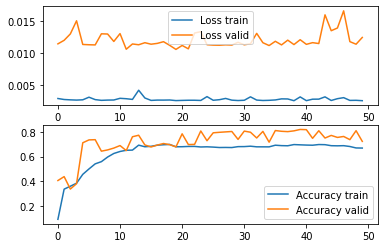

In [ ]:
collate_fn = partial(custom_collate_fn, pad_token_ix=word_to_ix["<pad>"])
train_loader = DataLoader(train_data, batch_size=train_batch_size,
                          shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, batch_size=validation_batch_size,
                          shuffle=True, collate_fn=collate_fn)

optimizer = torch.optim.AdamW(lstm_2.parameters())
train(loss_function, optimizer, lstm_2, train_loader, valid_loader, num_epochs=50)


#### **Pesos del Word2vec**

Se genera un modelo `Word2vec` con el fin de extraer los pesos para inicializar el programa.

**Nota:** En colab el parámetro del `Word2Vec` se llama *size*, en otros medios puede necesitar usar *vector_size*.

In [ ]:
from gensim.models import Word2Vec

Este modelo Word2Vec usa CBOW, con una ventana de tamaño 5 y una dimensión de embedding de 200.

Epoch 0 accuracy: 0.1196 loss: 0.0027 val_accuracy: 0.1679  val_loss: 0.0134
Epoch 9 accuracy: 0.6271 loss: 0.0029 val_accuracy: 0.6789  val_loss: 0.0114
Epoch 19 accuracy: 0.6446 loss: 0.0029 val_accuracy: 0.6488  val_loss: 0.0125
Epoch 29 accuracy: 0.6810 loss: 0.0027 val_accuracy: 0.5797  val_loss: 0.0115
Epoch 39 accuracy: 0.6814 loss: 0.0031 val_accuracy: 0.5432  val_loss: 0.0110
Epoch 49 accuracy: 0.6334 loss: 0.0027 val_accuracy: 0.5828  val_loss: 0.0130


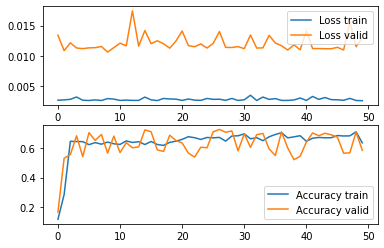

In [ ]:
min_count = 0
workers = 3 
sg = 0 
window = 5 
sample = 1e-3 
embedding_dim = 200

wv = Word2Vec(sentences = sentences, min_count=min_count, size=embedding_dim, workers=workers, window=window, sg=sg, sample=sample) 
more_sentences = [["<pad>", "<unk>"]]
wv.build_vocab(more_sentences, update = True)
wv.train(more_sentences, total_examples=wv.corpus_count, epochs = wv.epochs)

lstm = LSTMTagger(embedding_dim=embedding_dim, vocab_size=len(word_to_ix), 
                  tagset_size=len(tag_to_ix), hidden_dim = 64, embedding_init = torch.FloatTensor(wv.wv.vectors))

optimizer = torch.optim.AdamW(lstm.parameters())
train(loss_function, optimizer, lstm, train_loader, valid_loader, num_epochs=50)

Esta precisión es mejor que inicializar con pesos aleatorios, llegando a una precisión de 59%, pero peor que inicializar con los pesos del modelo de la primera parte.

## **Visualización**



In [ ]:
import spacy
from spacy import displacy
from IPython.core.display import display, HTML

In [ ]:
comment = "Este es un excelente articulo, pero puede mejorar"
test_sentence = clean_text(comment)
test_sentence = [word_to_ix.get(s, word_to_ix["<unk>"]) for s in test_sentence.split()]
test_sentence = torch.LongTensor([test_sentence])
outputs = lstm_2.forward(test_sentence)
labels_pred = torch.argmax(outputs, dim=2)

In [ ]:
def prepare_dict(sentence, labels):
  idx_to_tag = {0:"OTRO", 1:"MUY NEGATIVO", 2:"NEGATIVO", 3:"NEUTRAL",4: "POSITIVO", 5:"MUY POSITIVO"}

  list_dict = []

  cont_s = 0
  cont_e = 0
  idx = labels[0]
  cont_l = 0
  while cont_l < len(sentence):
      cont_e += len(sentence[cont_l]) + 1
      cont_l += 1
      if cont_l < len(labels) and labels[cont_l] != idx:
        list_dict.append({"start":cont_s, "end":cont_e, "label":idx_to_tag[idx]})
        cont_s = cont_e 
        idx = labels[cont_l]
      if len(labels) - cont_l == 1:
          cont_e += len(sentence[cont_l])
          list_dict.append({"start":cont_s, "end":cont_e, "label":idx_to_tag[idx]})
  return list_dict

In [ ]:
d = prepare_dict(comment.split(), labels_pred[0].tolist())

In [ ]:
ex = [{"text": comment, "ents":d, "title":None}]
colors = {'MUY NEGATIVO': "#E74C3C", "NEGATIVO": "#E67E22", "NEUTRAL":"#F1C40F", "POSITIVO":"#58D68D", "MUY POSITIVO":"#27AE60", "OTRO":"#FDFEFE"}
options = {"ents": ['OTRO', 'MUY NEGATIVO', 'NEGATIVO', 'NEUTRAL', 'POSITIVO', 'MUY POSITIVO'], "colors": colors}

html = displacy.render(ex, style="ent", manual=True, options = options)
display(HTML(html))

# **Sección Teórica**

#### **Pregunta 1.**

¿Qué diferencias encuentran con un tipo de clasificación respecto al otro?

En la primera parte se recibe para la totalidad del texto una sola etiqueta, mientras que en la segunda se posee una etiqueta por cada palabra. Esto ayuda enormemente a la precisión de la red neuronal, debido a que le es más fácil identificar si una palabra representa algo bueno o algo malo del artículo a que si toda la reseña se puede considerar positiva o negativa, algo que incluso un ser humano se puede confundir haciendo. Por ejemplo, la red se puede confundir con una reseña en la que se diga que es un buen artículo para posteriormente listar una serie de problemas que posee, mientras que el autor que le da una calificación positiva. Por otra parte, en ese mismo contexto la red tiene más fácil la tarea en la parte dos, donde etiqueta fragmentos del texto.

#### **Pregunta 2.**

¿Los pesos de una tarea ayudan a la otra?

Los pesos ayudan enormemente a la parte 2. Aunque la precisión del algoritmo con los pesos inicializados de forma aleatoria es buena (mayor del 0.5), esta sube a más de 0.6 con pesos inicializados de Word2Vec, a más de 0.7 con pesos inicializados de la primera parte, aunque el primer modelo no tenía una precisión tan buena. No obstante, esto último también se puede deber a que se aumentó la complejidad de la red en relación con los otros dos casos para poder transferir los pesos de la primera parte a la segunda.

#### **Pregunta 3.**

¿Es posible analizar o intuir a partir de pesos o activaciones, que parte del texto está ayudando en la parte 1 a clasificar?

Sí es posible, aunque en el proyecto no lo llevamos a cabo. Por ejemplo, está la librería asociada `pytorch` llamada `captum`, en donde se pueden utilizar distintos tipos de algoritmos para este fin y ayudar a identificar qué palabras o partes del texto se activan más en la red neuronal para que esta de la clase resultado.

# **Conclusiones**

Finalmente, podemos destacar las siguientes conclusiones:

- Con el fin de obtener resultados apropiados es imperativo realizar el correcto procesamiento previo de los datos, antes de empezar a emplear métodos de clasificación o cualquier algoritmo, dado que los números o caracteres especiales pueden deteriorar el proceso de entrenamiento y terminar con predicciones sin sentido. 

- En caso de no contar con *dataset* balanceado es muy importante tener en cuenta los pesos que maneja el modelo para cada una de sus clases, esto con el fin de obtener un modelo de predicción que no tenga tendencias hacia ciertas etiquetas. Para evitar esto se asignan los pesos dependiendo de la distribución inicial de los datos.

- Debido a la naturaleza de los datos, es necesario realizar el proceso de asignación de etiquetas para cada una de las palabras con el fin de lograr el sistema de clasificación deseado. Además, esta operación influye directamente en el resultado del modelo y su veracidad será solo tan buena como su asignación inicial.

- Finalmente, podemos afirmar que el hecho de emplear los pesos del modelo anterior para realizar la clasificación por palabras en la segunda sección otorga un resultado mucho mejor en comparación, esto se debe a que los pesos resultantes del primer modelo ya han pasado por un proceso de entrenamiento, lo cual permite contar con un punto de partida satisfactorio, en lugar de valores aleatorios. 

<div style="text-align: right"><b> Ana Valentina López Chacón & Isabella Martínez Martínez & Sara Julieth Zuleta Quevedo. </b></div>